In [1]:
%pylab inline
import warnings
warnings.filterwarnings("ignore")
import nolearn
from nolearn.lasagne import NeuralNet
import readdata
import lasagne
from lasagne import layers
from sklearn import metrics
import detectobjects as det
import os.path
from scipy import misc
import cv2
from progress_bar import ProgressBar
import shapefeatures
from sklearn import ensemble
import dill as pickle

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
opts = {'img_dir': 'data/tuberculosis-phonecamera/images/',
        'annotation_dir': 'data/tuberculosis-phonecamera/annotation/',
        'detection_probability_threshold': 0.5,
        'detection_overlap_threshold': 0.3, 
        'gauss': 1,
        'patch_size': (160,160),
        'image_downsample' : 8,
        'detection_step': 5,
        'patch_creation_step': 40,
        'object_class': None,
        'negative_training_discard_rate': .9
       }
opts['patch_stride_training'] = int(opts['patch_size'][0]*.25)

In [3]:
reload(readdata)

<module 'readdata' from 'readdata.pyc'>

In [4]:
trainfiles, valfiles, testfiles = readdata.create_sets(opts['img_dir'], train_set_proportion=.5, 
                                                  test_set_proportion=.5,
                                                  val_set_proportion=0)

train_y,train_X = readdata.create_patches(trainfiles, opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])
test_y,test_X = readdata.create_patches(testfiles,  opts['annotation_dir'], opts['img_dir'], opts['patch_size'][0], opts['patch_stride_training'], grayscale=False, progressbar=True, downsample=opts['image_downsample'], objectclass=opts['object_class'], negative_discard_rate=opts['negative_training_discard_rate'])

# Cut down on disproportionately large numbers of negative patches
train_X, train_y = readdata.balance(train_X, train_y, mult_neg=100)
#test_X, test_y = readdata.balance(test_X, test_y, mult_neg=100)

# Create rotated and flipped versions of the positive patches
train_X, train_y = readdata.augment_positives(train_X, train_y)
test_X, test_y = readdata.augment_positives(test_X, test_y)

print '\n'
print '%d positive training examples, %d negative training examples' % (sum(train_y), len(train_y)-sum(train_y))
print '%d positive testing examples, %d negative testing examples' % (sum(test_y), len(test_y)-sum(test_y))
print '%d patches (%.1f%% positive)' % (len(train_y)+len(test_y), 100.*((sum(train_y)+sum(test_y))/(len(train_y)+len(test_y))))

('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('te

('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16da00b518>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f1729a8ad40>, None)
('test1:', 18)
('\r

View a random selection of positive and negative patches to see if they look right

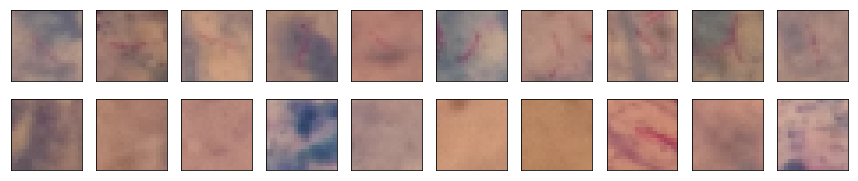

In [5]:
N_samples_to_display = 10
pos_indices = np.where(train_y)[0]
pos_indices = pos_indices[np.random.permutation(len(pos_indices))]
for i in range(N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_pos = train_X[pos_indices[i],:,:,:]
    example_pos = np.swapaxes(example_pos,0,2)
    plt.imshow(example_pos)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

neg_indices = np.where(train_y==0)[0]
neg_indices = neg_indices[np.random.permutation(len(neg_indices))]
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = train_X[neg_indices[i],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
plt.gcf().set_size_inches(1.5*N_samples_to_display,3)

### CNN training

In [6]:
def CNN(n_epochs):
    net1 = NeuralNet(
        layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),      #Convolutional layer.  Params defined below
        ('pool1', layers.MaxPool2DLayer),   # Like downsampling, for execution speed
        ('lstm', layers.LSTMLayer),
        ('output', layers.DenseLayer),
        ],
        
    input_shape=(None, 3, opts['patch_size'][0]/opts['image_downsample'], 
                 opts['patch_size'][0]/opts['image_downsample']),
    conv1_num_filters=7, 
    conv1_filter_size=(3, 3), 
    conv1_nonlinearity=lasagne.nonlinearities.rectify,
        
    pool1_pool_size=(2, 2),
        
    lstm_num_units=50,
       
    output_num_units=2, 
    output_nonlinearity=lasagne.nonlinearities.softmax,

    update_learning_rate=0.0001,
    update_momentum=0.9,

    max_epochs=n_epochs,
    verbose=1,
    )
    return net1

cnn = CNN(500).fit(train_X, train_y)

# Neural Network with 27448 learnable parameters

## Layer information

  #  name    size
---  ------  -------
  0  input   3x20x20
  1  conv1   7x18x18
  2  pool1   7x9x9
  3  lstm    7x50
  4  output  2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.67660     0.66530    1.01699      0.57830  22.60s
      2     0.65416     0.64455    1.01491      0.61537  22.35s
      3     0.63092     0.61354    1.02832      0.66310  22.71s
      4     0.58537     0.54850    1.06722      0.74485  22.95s
      5     0.50177     0.45287    1.10797      0.83573  22.41s
      6     0.40264     0.36097    1.11544      0.87902  22.36s
      7     0.32467     0.30372    1.06897      0.89676  22.55s
      8     0.28163     0.27324    1.03068      0.90570  22.35s
      9     0.25623     0.25268    1.01409      0.90994  22.70s
     10     0.23735     0.23918    0.99233      0.91292  22.69s
     11     0.22643     0.230

    100     0.14743     0.15743    0.93652      0.94695  22.62s
    101     0.14749     0.15659    0.94192      0.94753  22.38s
    102     0.14742     0.15860    0.92951      0.94550  22.53s
    103     0.14743     0.15625    0.94355      0.94645  22.40s
    104     0.14663     0.15581    0.94107      0.94689  22.37s
    105     0.14667     0.15425    0.95086      0.94746  22.74s
    106     0.14622     0.15474    0.94492      0.94803  22.44s
    107     0.14618     0.15493    0.94351      0.94702  23.03s
    108     0.14583     0.15492    0.94131      0.94670  22.67s
    109     0.14559     0.15522    0.93797      0.94708  22.42s
    110     0.14571     0.15477    0.94148      0.94651  23.18s
    111     0.14527     0.15413    0.94248      0.94689  22.87s
    112     0.14517     0.15475    0.93808      0.94619  22.33s
    113     0.14500     0.15496    0.93574      0.94670  22.66s
    114     0.14464     0.15469    0.93505      0.94657  22.39s
    115     0.14437     0.15281    0.944

    213     0.12911     0.14255    0.90575      0.95069  22.63s
    214     0.12907     0.14246    0.90602      0.95095  22.48s
    215     0.12894     0.14094    0.91489      0.95190  22.59s
    216     0.12851     0.14317    0.89761      0.95126  23.00s
    217     0.12878     0.14324    0.89902      0.95069  22.46s
    218     0.12847     0.14194    0.90509      0.95114  22.50s
    219     0.12824     0.14242    0.90040      0.95107  22.58s
    220     0.12845     0.14302    0.89815      0.95050  22.50s
    221     0.12814     0.14127    0.90704      0.95120  22.90s
    222     0.12816     0.14280    0.89753      0.95082  22.51s
    223     0.12809     0.14025    0.91330      0.95234  22.49s
    224     0.12778     0.14245    0.89703      0.95095  22.58s
    225     0.12778     0.14213    0.89903      0.95139  22.62s
    226     0.12780     0.14160    0.90257      0.95082  22.87s
    227     0.12748     0.14111    0.90342      0.95145  22.44s
    228     0.12734     0.14053    0.906

    330     0.11717     0.13255    0.88402      0.95589  22.44s
    331     0.11746     0.13364    0.87895      0.95519  22.41s
    332     0.11726     0.13260    0.88427      0.95589  22.43s
    333     0.11704     0.13234    0.88440      0.95589  22.70s
    334     0.11736     0.13413    0.87497      0.95475  22.38s
    335     0.11728     0.13242    0.88567      0.95545  22.57s
    336     0.11680     0.13263    0.88065      0.95589  22.42s
    337     0.11701     0.13225    0.88477      0.95583  22.42s
    338     0.11660     0.13462    0.86615      0.95462  22.76s
    339     0.11667     0.13196    0.88418      0.95621  22.43s
    340     0.11664     0.13259    0.87967      0.95564  22.43s
    341     0.11636     0.13327    0.87309      0.95507  22.45s
    342     0.11645     0.13280    0.87685      0.95545  22.49s
    343     0.11612     0.13260    0.87569      0.95551  22.69s
    344     0.11580     0.13316    0.86966      0.95545  22.52s
    345     0.11607     0.13350    0.869

    449     0.10785     0.12684    0.85025      0.95817  22.91s
    450     0.10786     0.12619    0.85477      0.95836  22.57s
    451     0.10809     0.12608    0.85730      0.95824  22.41s
    452     0.10733     0.12619    0.85058      0.95798  22.59s
    453     0.10761     0.12794    0.84107      0.95665  23.44s
    454     0.10743     0.12579    0.85404      0.95824  24.07s
    455     0.10801     0.12656    0.85341      0.95881  22.51s
    456     0.10720     0.12521    0.85623      0.95868  22.57s
    457     0.10727     0.12734    0.84241      0.95728  22.56s
    458     0.10716     0.12610    0.84983      0.95811  22.48s
    459     0.10672     0.12577    0.84856      0.95887  22.58s
    460     0.10679     0.12680    0.84223      0.95792  22.92s
    461     0.10674     0.12591    0.84775      0.95836  22.49s
    462     0.10708     0.12574    0.85161      0.95830  25.97s
    463     0.10669     0.12496    0.85379      0.95944  22.88s
    464     0.10669     0.12719    0.838

### Make predictions and evaluate on test data

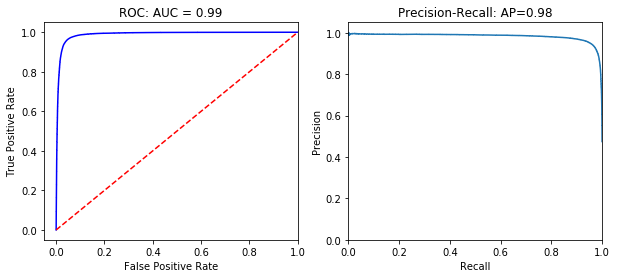

In [7]:
y_pred = cnn.predict_proba(test_X)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

precision, recall, thresholds = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision = metrics.average_precision_score(test_y, y_pred[:, 1])

subplot(121)
plt.title('ROC: AUC = %0.2f'% roc_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(122)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")

plt.gcf().set_size_inches(10,4)

plt.savefig('figs/tuberculosis-patchevaluation.png', bbox_inches='tight')

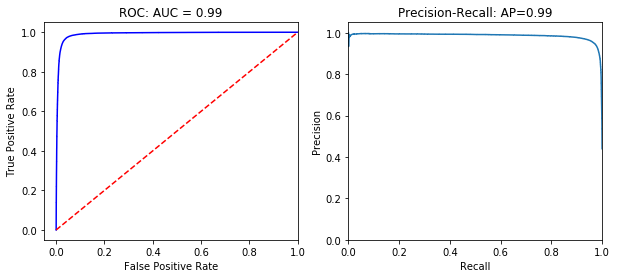

In [8]:
y_pred = cnn.predict_proba(train_X)

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(train_y, y_pred[:,1])
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

precision, recall, thresholds = metrics.precision_recall_curve(train_y, y_pred[:,1])
average_precision = metrics.average_precision_score(train_y, y_pred[:, 1])

subplot(121)
plt.title('ROC: AUC = %0.2f'% roc_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(122)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="lower left")

plt.gcf().set_size_inches(10,4)

plt.savefig('figs/tuberculosis-patchevaluation.png', bbox_inches='tight')

In [10]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(test_y, y_pred[:,1])
true_positive_rate.shape, thresholds.shape
plt.plot(true_positive_rate, thresholds,label='True positive rate')
plt.plot(false_positive_rate, thresholds, label='False positive rate')
plt.xlabel('Threshold')
plt.ylim([0,1.01])
plt.legend(loc='upper left')

ValueError: Found input variables with inconsistent numbers of samples: [79590, 78887]

**Examine mistakes to understand network performance: false positives.** 

Find the negative-labelled patches with highest prediction score

In [11]:
neg_indices = np.where(test_y==0)[0]
neg_scores = y_pred[neg_indices,1]
neg_indices = neg_indices[neg_scores.argsort()]
neg_indices = neg_indices[::-1]

neg_scores = y_pred[neg_indices,1]

N_samples_to_display = 12
offset = 55
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[neg_indices[i+offset],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % neg_scores[i+offset])
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/tuberculosis-falsedetections.png', bbox_inches='tight')

IndexError: index 78888 is out of bounds for axis 0 with size 78887

See highest-scored test patches

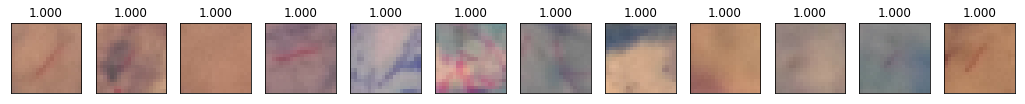

In [12]:
prob_range = [.95,1.]

tmp_scores = y_pred.copy()[:,1]
tmp_scores[tmp_scores<prob_range[0]] = -1
tmp_scores[tmp_scores>prob_range[1]] = -1

pos_indices = tmp_scores.argsort()
pos_indices = pos_indices[::-1]

N_samples_to_display = 12
offset = 0
for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[pos_indices[i+offset],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % (tmp_scores[pos_indices[i+offset]]))
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/tuberculosis-detectedpatches.png', bbox_inches='tight')

See lowest scored test patches

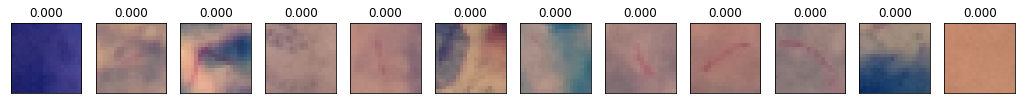

In [13]:
pos_indices = y_pred[:,1].argsort()

N_samples_to_display = 12

for i in range(N_samples_to_display,2*N_samples_to_display):
    plt.subplot(2,N_samples_to_display,i+1)
    example_neg = test_X[pos_indices[i],:,:,:]
    example_neg = np.swapaxes(example_neg,0,2)
    plt.imshow(example_neg)
    plt.title('%.3f' % (y_pred[pos_indices[i],1]))
    plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')    

plt.gcf().set_size_inches(1.5*N_samples_to_display,3) 

plt.savefig('figs/tuberculosis-testpatches-lowprob.png', bbox_inches='tight')

### Example of objects detected in an entire image

The white boxes represent annotations in the training data. Red boxes are detections by the convnet.

(1224, 1632, 3, 5, 244.8)


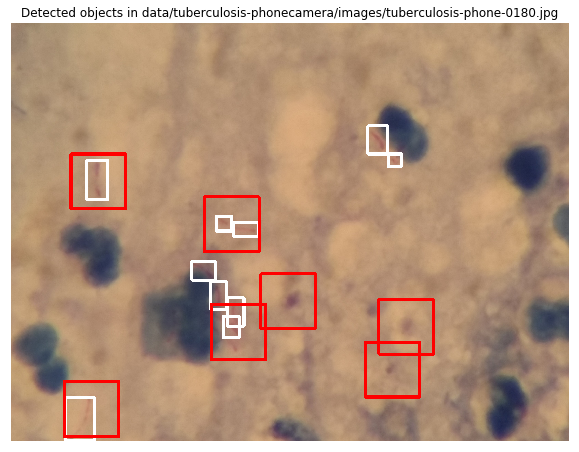

In [14]:
reload(det)

fname = testfiles[0]
imfile = opts['img_dir'] + fname
opts['detection_probability_threshold'] = 0.99
found = det.detect(imfile, cnn, opts)

im = misc.imread(imfile)

plt.box(False)
plt.xticks([])
plt.yticks([])

annofile = opts['annotation_dir'] + fname[:-3] + 'xml'
bboxes = readdata.get_bounding_boxes_for_single_image(annofile)
for bb in bboxes:
    bb = bb.astype(int)
    cv2.rectangle(im, (bb[0],bb[2]), (bb[1],bb[3]), (255,255,255), 8)  

for f in found:
    f = f.astype(int)
    cv2.rectangle(im, (f[0],f[1]), (f[2],f[3]), (255,0,0), 8)

plt.gcf().set_size_inches(10,10)
plt.title('Detected objects in %s' % (imfile))
plt.imshow(im)

#cv2.imwrite('detectionimages/detected-' + os.path.basename(imfile),im)

### Evaluation: compare with classification based on morphological feature extraction

In [15]:
featureset = [3,7,11,12,15,17]
centiles = [0,25,50,75,100]

pb = ProgressBar(train_X.shape[0])
train_X_f = []
for i in range(train_X.shape[0]):
    if i % 100 == 0:
        pb.step(i)
    graypatch = cv2.cvtColor(np.swapaxes(train_X[i,:,:,:],0,2).astype('uint8'), cv2.COLOR_BGR2GRAY)
    train_X_f.append(shapefeatures.extract(graypatch,attributes=featureset,centiles=centiles, momentfeatures=True))
train_X_f = np.vstack(train_X_f)

test_X_f = []
for i in range(test_X.shape[0]):
    if i % 100 == 0:
        pb.step(i)
    graypatch = cv2.cvtColor(np.swapaxes(test_X[i,:,:,:],0,2).astype('uint8'), cv2.COLOR_BGR2GRAY)
    test_X_f.append(shapefeatures.extract(graypatch,attributes=featureset,centiles=centiles, momentfeatures=True))
test_X_f = np.vstack(test_X_f)

('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('te

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 19)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 18)
('\r

('\r', <progress_bar.ProgressBar instance at 0x7f16a86f6908>, None)
('test1:', 17)


In [16]:
clf = ensemble.ExtraTreesClassifier(n_estimators=100, max_depth=5, n_jobs=-1)
clf.fit(train_X_f, train_y)
y_pred_CLF = clf.predict_proba(test_X_f)

In [17]:
false_positive_rate_CNN, true_positive_rate_CNN, thresholds_CNN = metrics.roc_curve(test_y, y_pred[:,1])
roc_auc_CNN = metrics.auc(false_positive_rate_CNN, true_positive_rate_CNN)

precision_CNN, recall_CNN, thresholds_CNN = metrics.precision_recall_curve(test_y, y_pred[:,1])
average_precision_CNN = metrics.average_precision_score(test_y, y_pred[:, 1])

false_positive_rate_CLF, true_positive_rate_CLF, thresholds_CLF = metrics.roc_curve(test_y, y_pred_CLF[:,1])
roc_auc_CLF = metrics.auc(false_positive_rate_CLF, true_positive_rate_CLF)

precision_CLF, recall_CLF, thresholds_CLF = metrics.precision_recall_curve(test_y, y_pred_CLF[:,1])
average_precision_CLF = metrics.average_precision_score(test_y, y_pred_CLF[:, 1])

subplot(211)
plt.title('ROC' )
plt.plot(false_positive_rate_CNN, true_positive_rate_CNN, 'b', label='CNN: AUC=%.2f' % (roc_auc_CNN))
plt.plot(false_positive_rate_CLF, true_positive_rate_CLF, 'k--', label='ERT: AUC=%.2f' % (roc_auc_CLF))
plt.legend(loc='lower right')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

subplot(212)
plt.plot(recall_CNN, precision_CNN, label='CNN: AP=%.2f' % (average_precision_CNN))
plt.plot(recall_CLF, precision_CLF,'k--', label='ERT: AP=%.2f' % (average_precision_CLF))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")

plt.gcf().set_size_inches(4,10)

plt.savefig('figs/tuberculosis-patchevaluation.png', bbox_inches='tight')

ValueError: Found input variables with inconsistent numbers of samples: [79590, 78887]

In [18]:
results = {
"false_positive_rate_CNN": false_positive_rate_CNN,
"true_positive_rate_CNN": true_positive_rate_CNN,
"false_positive_rate_CLF": false_positive_rate_CLF,
"true_positive_rate_CLF": true_positive_rate_CLF,
"roc_auc_CNN": roc_auc_CNN,
"roc_auc_CLF": roc_auc_CLF,
"recall_CNN": recall_CNN,
"precision_CNN": precision_CNN,
"average_precision_CNN": average_precision_CNN,
"recall_CLF": recall_CLF,
"precision_CLF": precision_CLF,
"average_precision_CLF": average_precision_CLF,
"opts": opts
}
import pickle
pickle.dump(results,open('tuberculosis-results.pkl','w'))

NameError: name 'false_positive_rate_CNN' is not defined